In [1]:
import os
import warnings

warnings.filterwarnings("ignore")  # avoid printing out absolute paths
# os.chdir("../../..")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("WMX - impr forecast - KT") \
    .enableHiveSupport()\
    .config("hive.exec.dynamic.partition", "true")\
    .config("hive.exec.dynamic.partition.mode", "nonstrict")\
    .config("spark.sql.catalogImplementation","hive")\
    .config("spark.sql.hive.convertMetastoreOrc", "false")\
    .config("spark.executor.memory", "32G")\
    .config("spark.driver.memory", "32G")\
    .config("spark.network.timeout", "43200")\
    .config("spark.rdd.compress", "true")\
    .config("spark.cores.max", "512")\
    .config("spark.default.parallelism", "256")\
    .config("spark.dynamicAllocation.minExecutors", "64")\
    .config("spark.dynamicAllocation.maxExecutors", "2048")\
    .config("spark.executor.memoryOverhead", "10G")\
    .config("spark.sql.hive.convertMetastoreOrc", "false")\
    .config("spark.sql.execution.arrow.enabled","true")\
    .config("spark.sql.execution.arrow.pyspark.enabled", "true")\
    .config("spark.driver.maxResultSize","0")\
    .config("spark.memory.offHeap.enabled","true") \
    .config("spark.memory.offHeap.size","10g")\
    .config('spark.jars', 'gs://spark-lib/bigquery/spark-bigquery-latest_2.11.jar')\
    .getOrCreate()

In [ ]:
print('^^^^^^^^^^^')



In [2]:
# !pip install --ignore-installed protobuf==3.18.0

In [24]:
cloud_dir = "ds/forecast/demand_forecast/"
evaluation_results_filename = 'internal_evaluation/'
forecast_result_filename='prediction/'

In [199]:

filename='forecasting_Prophet.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_prophet_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_prophet_df['_c0']
del forecast_prophet_df['ds']
for col in forecast_prophet_df:
    forecast_prophet_df[col]=forecast_prophet_df[col].values.astype(float)

In [200]:
filename='forecasting_MSTL.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_mstl_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_mstl_df['_c0']
for col in forecast_mstl_df:
    forecast_mstl_df[col]=forecast_mstl_df[col].values.astype(float)

In [201]:

filename='forecasting_NeuralProphet.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_neuralprophet_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_neuralprophet_df['_c0']
del forecast_neuralprophet_df['ds']
for col in forecast_neuralprophet_df:
    forecast_neuralprophet_df[col]=forecast_neuralprophet_df[col].values.astype(float)

In [202]:

filename='forecasting_Ml.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_ml_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_ml_df['_c0']
del forecast_ml_df['ds']
for col in forecast_ml_df:
    forecast_ml_df[col]=forecast_ml_df[col].values.astype(float)

In [203]:
filename='forecasting_BATS.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_bats_df = spark.read.format("bigquery").option("header", True).option('sep', ',').csv(path).toPandas()
del forecast_bats_df['_c0']
for col in forecast_bats_df:
    forecast_bats_df[col]=forecast_bats_df[col].values.astype(float)

In [221]:
filename='forecasting_TBATS.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_tbats_df = spark.read.format("bigquery").option("header", True).option('sep', ',').csv(path).toPandas()
del forecast_tbats_df['_c0']
for col in forecast_tbats_df:
    forecast_tbats_df[col]=forecast_tbats_df[col].values.astype(float)

In [222]:
filename='forecasting_Prophet_Interval_Width.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_prophet_interval_width = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_prophet_interval_width['_c0']
for col in forecast_prophet_interval_width:
    forecast_prophet_interval_width[col]=forecast_prophet_interval_width[col].values.astype(float)

In [25]:
#PE:
filename='evaluation_Prophet.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+evaluation_results_filename+filename
eval_prophet_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del eval_prophet_df['_c0']


In [26]:
#PE:
filename='evaluation_BATS.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+evaluation_results_filename+filename
eval_bats_df = spark.read.format("bigquery").option("header", True).option('sep', ',').csv(path).toPandas()
del eval_bats_df['_c0']

In [27]:
#PE:
filename='evaluation_TBATS.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+evaluation_results_filename+filename
eval_tbats_df = spark.read.format("bigquery").option("header", True).option('sep', ',').csv(path).toPandas()
del eval_tbats_df['_c0']

In [28]:
#PE:
filename='evaluation_Ml.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+evaluation_results_filename+filename
eval_ml_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del eval_ml_df['_c0']

In [29]:
#PE:
filename='evaluation_NeuralProphet.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+evaluation_results_filename+filename
eval_neuralprophet_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del eval_neuralprophet_df['_c0']

In [30]:
#PE:
filename='evaluation_MSTL.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+evaluation_results_filename+filename
eval_mstl_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del eval_mstl_df['_c0']
eval_mstl_df

,sp-SS-1p_pe,sp-SS-1p_smape,sp-SS-1p_wape,sp-SS-3p_pe,sp-SS-3p_smape,sp-SS-3p_wape,sp-API-1p_pe,sp-API-1p_smape,sp-API-1p_wape,sp-API-3p_pe,sp-API-3p_smape,sp-API-3p_wape
0,0.04921996385685516,0.201120921918761,0.20533838954294428,0.006304631676075739,0.17988910511576897,0.1802912730837472,0.02019729388064982,0.0913108996634814,0.08756071661853562,0.020725980537735916,0.3174469851823599,0.33391288724124457


In [31]:
eval_prophet_df.columns=['sp-SS-3p_pe', 'sp-SS-1p_pe', 'sp-API-1p_pe',
       'sp-API-3p_pe', 'sp-SS-3p_smape',
       'sp-SS-1p_smape', 'sp-API-1p_smape',
       'sp-API-3p_smape', 'sp-SS-3p_wape',
       'sp-SS-1p_wape', 'sp-API-1p_wape',
       'sp-API-3p_wape']
forecast_prophet_df.columns=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p',
       'sp-API-3p']

In [230]:
eval_prophet_df

,sp-SS-3p_pe,sp-SS-1p_pe,sp-API-1p_pe,sp-API-3p_pe,sp-SS-3p_smape,sp-SS-1p_smape,sp-API-1p_smape,sp-API-3p_smape,sp-SS-3p_wape,sp-SS-1p_wape,sp-API-1p_wape,sp-API-3p_wape
0,0.06877422598758366,0.010473442411096203,0.013341279779127092,0.18778731774613736,0.10547593037092458,0.06384111639901192,0.08198971886366016,0.2004240022762188,0.105870574115551,0.06362808360615803,0.08272657057708645,0.18859165510486112


In [32]:
eval_neuralprophet_df.columns=['sp-SS-3p_pe', 'sp-SS-1p_pe', 'sp-API-1p_pe',
       'sp-API-3p_pe', 'sp-SS-3p_smape',
       'sp-SS-1p_smape', 'sp-API-1p_smape',
       'sp-API-3p_smape', 'sp-SS-3p_wape',
       'sp-SS-1p_wape', 'sp-API-1p_wape',
       'sp-API-3p_wape']
forecast_neuralprophet_df.columns=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p',
       'sp-API-3p']

In [33]:

eval_ml_df.columns=['sp-SS-3p_pe', 'sp-SS-1p_pe', 'sp-API-1p_pe',
       'sp-API-3p_pe', 'sp-SS-3p_smape',
       'sp-SS-1p_smape', 'sp-API-1p_smape',
       'sp-API-3p_smape', 'sp-SS-3p_wape',
       'sp-SS-1p_wape', 'sp-API-1p_wape',
       'sp-API-3p_wape']
forecast_ml_df.columns=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p',
       'sp-API-3p']

In [34]:
eval_neuralprophet_df

,sp-SS-3p_pe,sp-SS-1p_pe,sp-API-1p_pe,sp-API-3p_pe,sp-SS-3p_smape,sp-SS-1p_smape,sp-API-1p_smape,sp-API-3p_smape,sp-SS-3p_wape,sp-SS-1p_wape,sp-API-1p_wape,sp-API-3p_wape
0,0.010405561201545994,0.022403076213117122,0.0029771164051554462,0.07718088999928108,0.11133590583674832,0.09207294798532681,0.07670648638481928,0.1545171992743724,0.1044804529365516,0.09022552069510432,0.07426116268058286,0.13664666481271612


In [35]:
eval_mets=[eval_prophet_df,eval_mstl_df]
dfs=[forecast_prophet_df,forecast_mstl_df]


In [239]:
eval_mets_all=[eval_prophet_df,eval_mstl_df,eval_bats_df,eval_tbats_df,eval_neuralprophet_df,eval_ml_df]
dfs_all=[forecast_prophet_df,forecast_mstl_df,forecast_bats_df,forecast_tbats_df,forecast_neuralprophet_df,forecast_ml_df]

In [240]:
eval_tbats_df

,sp-SS-1p_pe,sp-SS-1p_smape,sp-SS-1p_wape,sp-SS-3p_pe,sp-SS-3p_smape,sp-SS-3p_wape,sp-API-1p_pe,sp-API-1p_smape,sp-API-1p_wape,sp-API-3p_pe,sp-API-3p_smape,sp-API-3p_wape
0,0.135998347,0.144447901,0.142010157,0.689904704,0.528878503,0.689904704,0.561895504,0.444159825,0.561895504,1.14429306,0.749731995,1.14429306


In [241]:
eval_ml_df

,sp-SS-3p_pe,sp-SS-1p_pe,sp-API-1p_pe,sp-API-3p_pe,sp-SS-3p_smape,sp-SS-1p_smape,sp-API-1p_smape,sp-API-3p_smape,sp-SS-3p_wape,sp-SS-1p_wape,sp-API-1p_wape,sp-API-3p_wape
0,0.36611505330784855,0.19053075053007,0.2615910204682719,0.41467539809589815,0.46480693722255323,0.22673911175626912,0.30663332779209224,0.5493540202341471,0.3661150533078484,0.19192566673799638,0.2615910204682718,0.4146753980958984


In [242]:
def cal_pe(eval_dfs,prod,metric='_pe'):
    eval_mets=[eval_prophet_df,eval_mstl_df]
    #prods=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p','sp-API-3p']
    models=['Prophet','MSTL','BATS','TBATS','NeuralProphet','Ml']
    d={}
    for i in range(len(eval_dfs)):
        print(models[i])
        d[models[i]]=str(float(eval_dfs[i][prod+metric][0])*100)+'%'
    print('For the ',prod,' ',metric[1:],' metrice values are:')
    for k,v in d.items():
        print('                     ',k,' : ',v,end='\n')
    print('\n')
    return d
cal_pe(eval_mets_all,'sp-SS-3p')
cal_pe(eval_mets_all,'sp-SS-1p')
cal_pe(eval_mets_all,'sp-API-1p')
cal_pe(eval_mets_all,'sp-API-3p')

Prophet
MSTL
BATS
TBATS
NeuralProphet
Ml
For the  sp-SS-3p   pe  metrice values are:
                      Prophet  :  6.877422598758367%
                      MSTL  :  0.6304631676075738%
                      BATS  :  55.3934712%
                      TBATS  :  68.9904704%
                      NeuralProphet  :  1.0405561201545994%
                      Ml  :  36.61150533078485%


Prophet
MSTL
BATS
TBATS
NeuralProphet
Ml
For the  sp-SS-1p   pe  metrice values are:
                      Prophet  :  1.0473442411096203%
                      MSTL  :  4.9219963856855165%
                      BATS  :  15.630793500000001%
                      TBATS  :  13.599834699999999%
                      NeuralProphet  :  2.2403076213117123%
                      Ml  :  19.053075053007%


Prophet
MSTL
BATS
TBATS
NeuralProphet
Ml
For the  sp-API-1p   pe  metrice values are:
                      Prophet  :  1.334127977912709%
                      MSTL  :  2.019729388064982%
                      BA

{'Prophet': '18.778731774613735%',
 'MSTL': '2.0725980537735915%',
 'BATS': '426.01841570000005%',
 'TBATS': '114.42930600000001%',
 'NeuralProphet': '7.718088999928108%',
 'Ml': '41.467539809589816%'}

In [243]:
cal_pe(eval_mets,'sp-SS-3p',metric='_smape')
cal_pe(eval_mets,'sp-SS-1p',metric='_smape')
cal_pe(eval_mets,'sp-API-1p',metric='_smape')
cal_pe(eval_mets,'sp-API-3p',metric='_smape')

Prophet
MSTL
For the  sp-SS-3p   smape  metrice values are:
                      Prophet  :  10.547593037092458%
                      MSTL  :  17.988910511576897%


Prophet
MSTL
For the  sp-SS-1p   smape  metrice values are:
                      Prophet  :  6.384111639901192%
                      MSTL  :  20.112092191876098%


Prophet
MSTL
For the  sp-API-1p   smape  metrice values are:
                      Prophet  :  8.198971886366015%
                      MSTL  :  9.13108996634814%


Prophet
MSTL
For the  sp-API-3p   smape  metrice values are:
                      Prophet  :  20.04240022762188%
                      MSTL  :  31.744698518235992%




{'Prophet': '20.04240022762188%', 'MSTL': '31.744698518235992%'}

In [244]:
cal_pe(eval_mets,'sp-SS-3p',metric='_wape')
cal_pe(eval_mets,'sp-SS-1p',metric='_wape')
cal_pe(eval_mets,'sp-API-1p',metric='_wape')
cal_pe(eval_mets,'sp-API-3p',metric='_wape')

Prophet
MSTL
For the  sp-SS-3p   wape  metrice values are:
                      Prophet  :  10.587057411555099%
                      MSTL  :  18.029127308374722%


Prophet
MSTL
For the  sp-SS-1p   wape  metrice values are:
                      Prophet  :  6.362808360615803%
                      MSTL  :  20.533838954294428%


Prophet
MSTL
For the  sp-API-1p   wape  metrice values are:
                      Prophet  :  8.272657057708646%
                      MSTL  :  8.756071661853563%


Prophet
MSTL
For the  sp-API-3p   wape  metrice values are:
                      Prophet  :  18.85916551048611%
                      MSTL  :  33.39128872412446%




{'Prophet': '18.85916551048611%', 'MSTL': '33.39128872412446%'}

In [3]:
def create_ensemble_fit(dfs,eval_mets):

    forecast_avgEnsemble_pred=pd.DataFrame()
    forecast_weightedEnsemble_pred=pd.DataFrame()
    products=['sp-SS-3p','sp-SS-1p', 'sp-API-1p','sp-API-3p']
    for i in range(len(products)):
        forecast_avgEnsemble_pred[products[i]]=np.zeros(forecast_prophet_df.shape[0]).astype(float)
        forecast_weightedEnsemble_pred[products[i]]=np.zeros(forecast_prophet_df.shape[0]).astype(float)
        weights=0
        for j in range(len(dfs)):#number of methods
            val_weighted=dfs[j][products[i]].astype(float)*1/eval_mets[j][products[i]+'_pe'].values.astype(float)[0]
            weights+=1/eval_mets[j][products[i]+'_pe'].values.astype(float)[0]
            forecast_avgEnsemble_pred[products[i]]+=dfs[j][products[i]].astype(float)
            forecast_weightedEnsemble_pred[products[i]]+=val_weighted
        forecast_avgEnsemble_pred[products[i]]=forecast_avgEnsemble_pred[products[i]]/len(dfs)
        forecast_weightedEnsemble_pred[products[i]]=forecast_weightedEnsemble_pred[products[i]]/weights
    return forecast_avgEnsemble_pred,forecast_weightedEnsemble_pred

In [175]:
forecast_avg_E_df,forecast_weightedE_df=create_ensemble_fit(dfs,eval_mets)

In [245]:

forecast_avg_E_df_all,forecast_weightedE_df_all=create_ensemble_fit(dfs_all,eval_mets_all)


In [41]:
from google.cloud import bigquery

bigquery_client = bigquery.Client()

query = """
SELECT *,
FROM
  (SELECT
          delivery_dt as dt,
          d_adv_product_skey as Product,
          sum(gross_revenue_1p) AS Revenue
   FROM `wmt-84fe52fae01cc3d4b5e52e8625.wmg_edw_prod.f_ad_delivery_daily`
   WHERE d_adv_product_skey in ('sp-API-1p',
                                'sp-SS-3p',
                                'sp-SS-1p',
                                'sp-API-3p',
                                'DSP-SS')
   GROUP BY 1,2) order by dt asc;
"""
#print(query)
job = bigquery_client.query(query)
df = job.to_dataframe()

In [5]:
def plot_forecast(df,df_x,df_fill, model='prophet',forecast_days=90):
    products=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p', 'sp-API-3p']
    
    f, a = plt.subplots(nrows=2, ncols=2, sharex=False,figsize=(15, 8))
    f.tight_layout(pad=3)
    ax = a
    i,j=0,0
    counter=0
    df_ts_future = pd.DataFrame(pd.date_range(start='2023-02-27', periods=forecast_days), columns=['dt'])
    
    df_x['ds']=df_ts_future['dt']
    for ix,product in enumerate(products):
        i,j=divmod(counter,2)
        
        df_z=df[df['Product']==product]
        ax[i,j].plot(df_z['dt'],df_z['Revenue'], '-',lw=2)
        
        col=product
        
        col_lower=product+'_lower_interval_width'
        col_upper=product+'_upper_interval_width'
        
        df_u=df_x[[col,'ds']]
        df_w=df_fill[[col_lower,col_upper]]
        
        ax[i,j].plot(df_u['ds'],df_u[col].values.astype(float), color='r',lw=2 )#label = metrice
        ax[i,j].fill_between(x=df_u['ds'], y1=-df_w[col_lower].values.astype(float)+df_u[col].values.astype(float), 
                         y2 = df_w[col_upper].values.astype(float)+df_u[col].values.astype(float), alpha=0.5, color='salmon')

        counter+=1
        
        ax[i,j].set_ylabel("$Revenue")
        ax[i,j].set_xlabel("Date")
        ax[i,j].set_title(str(product)+' forecasting for '+str(model)+' model')
        
    f.legend(['Actual Revenue','Forecasted Revenue','95% PI'])
    return


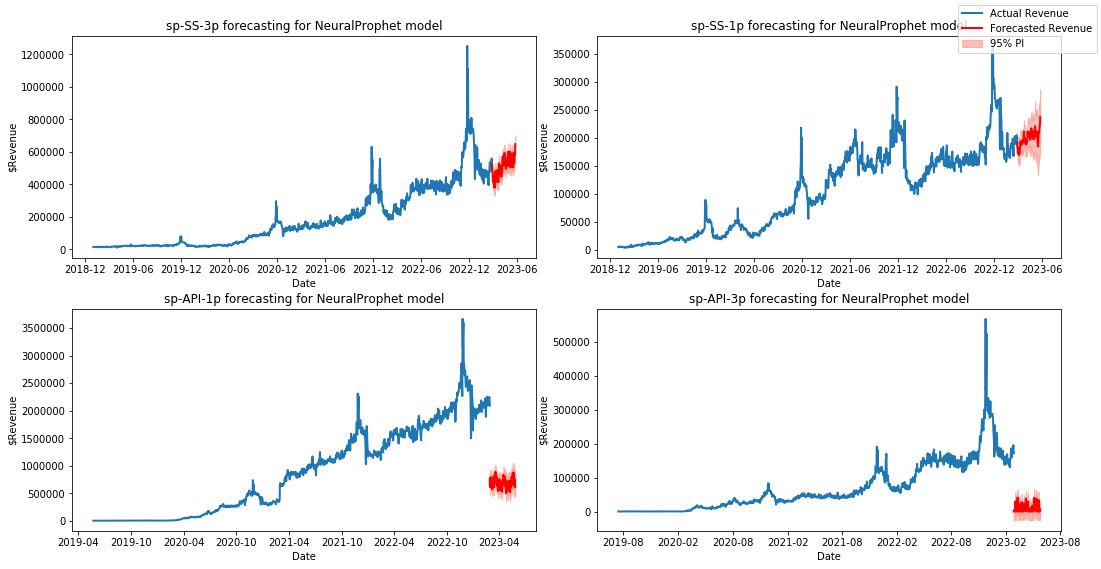

In [177]:
plot_forecast(df,forecast_neuralprophet_df,forecast_prophet_interval_width,model='NeuralProphet')

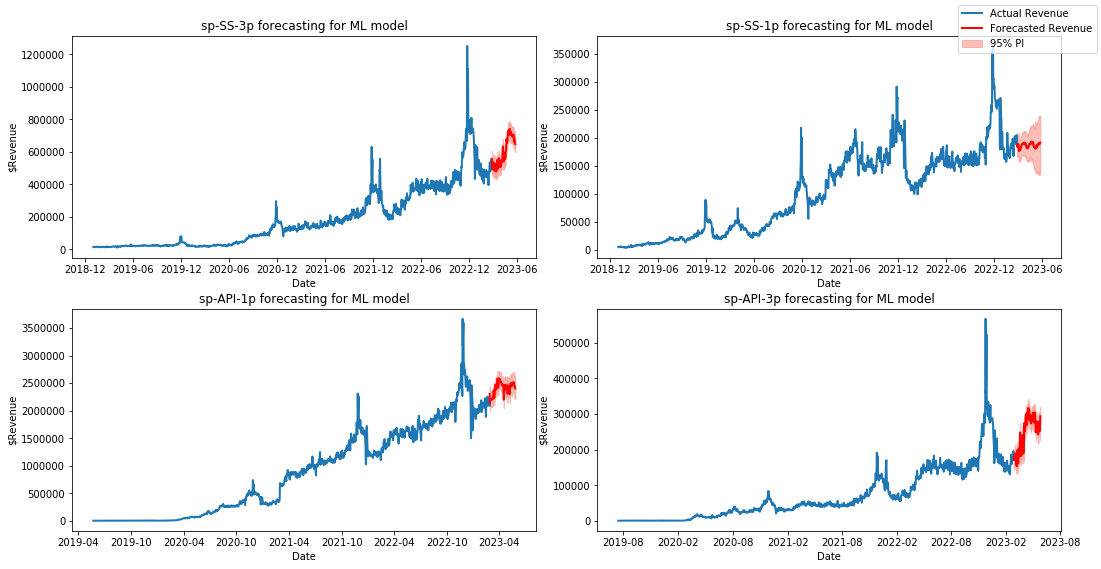

In [119]:
plot_forecast(df,forecast_ml_df,forecast_prophet_interval_width,model='ML')

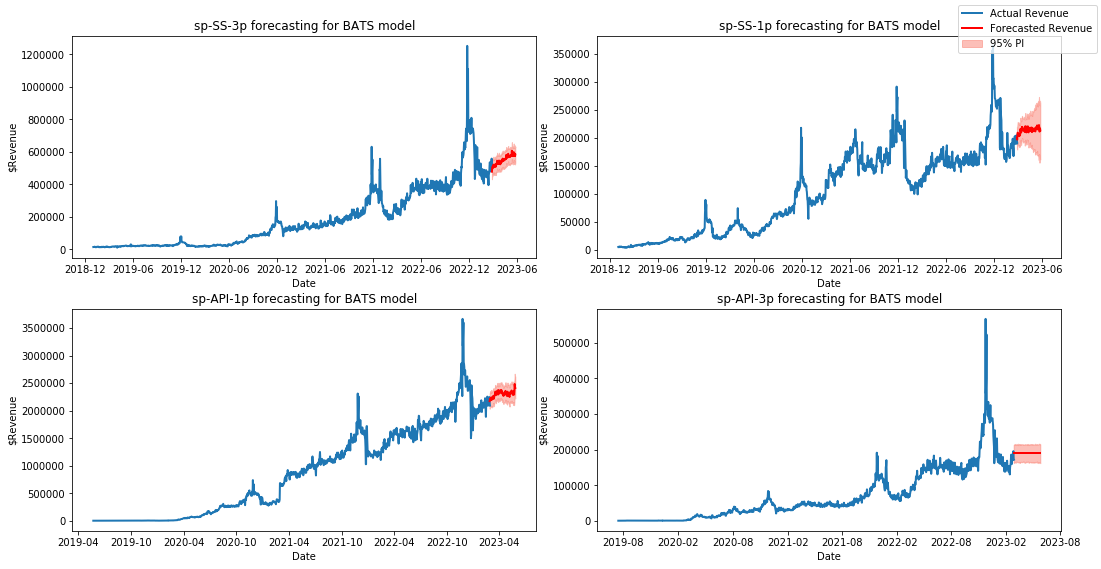

In [147]:
plot_forecast(df,forecast_bats_df,forecast_prophet_interval_width,model='BATS')

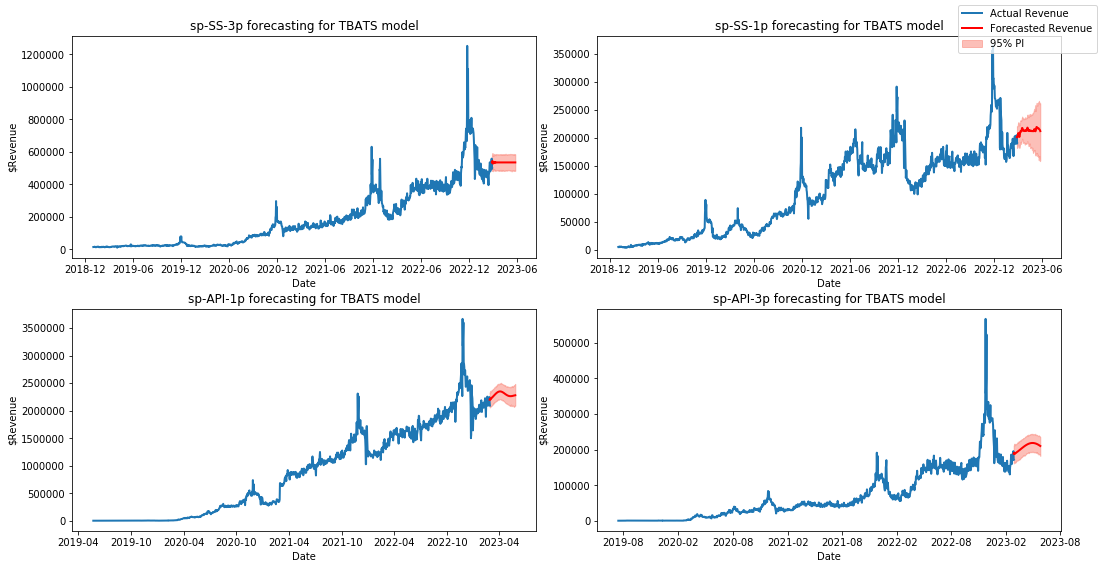

In [146]:
plot_forecast(df,forecast_tbats_df,forecast_prophet_interval_width,model='TBATS')

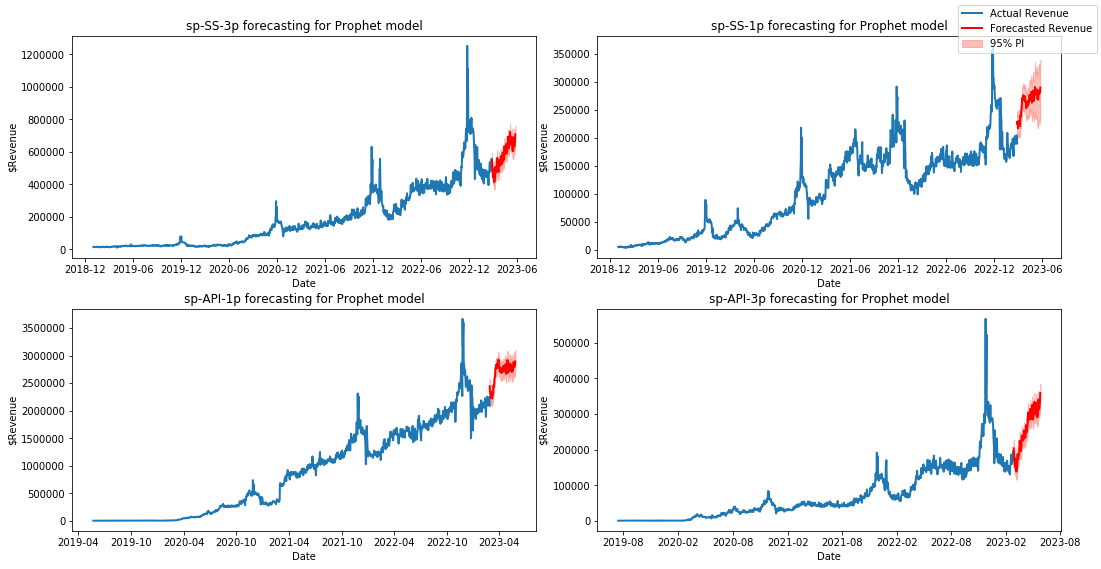

In [85]:

plot_forecast(df,forecast_prophet_df,forecast_prophet_interval_width,model='Prophet')

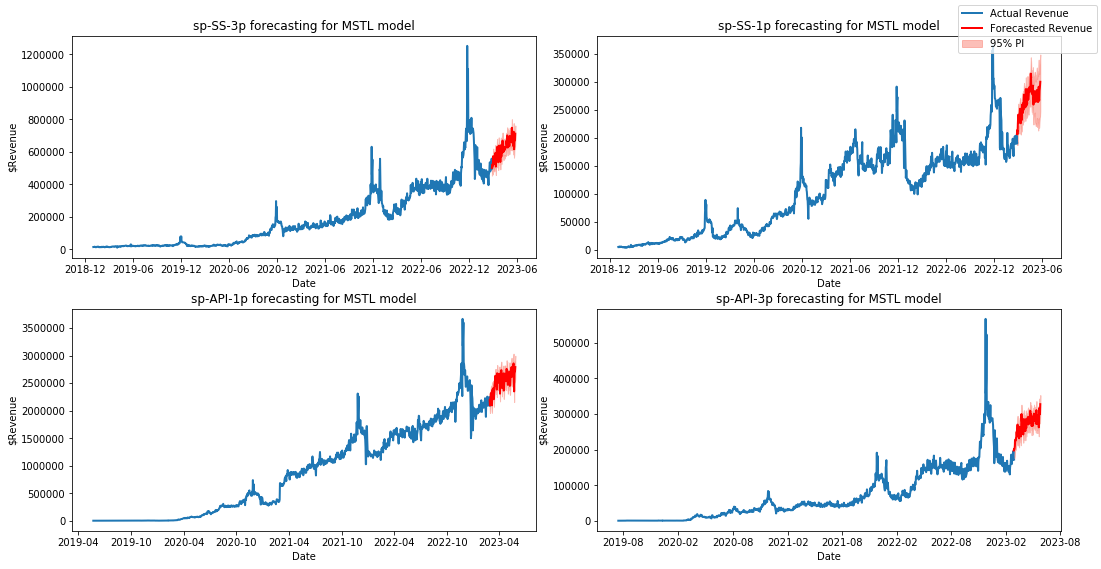

In [18]:
plot_forecast(df,forecast_mstl_df,forecast_prophet_interval_width,model='MSTL')

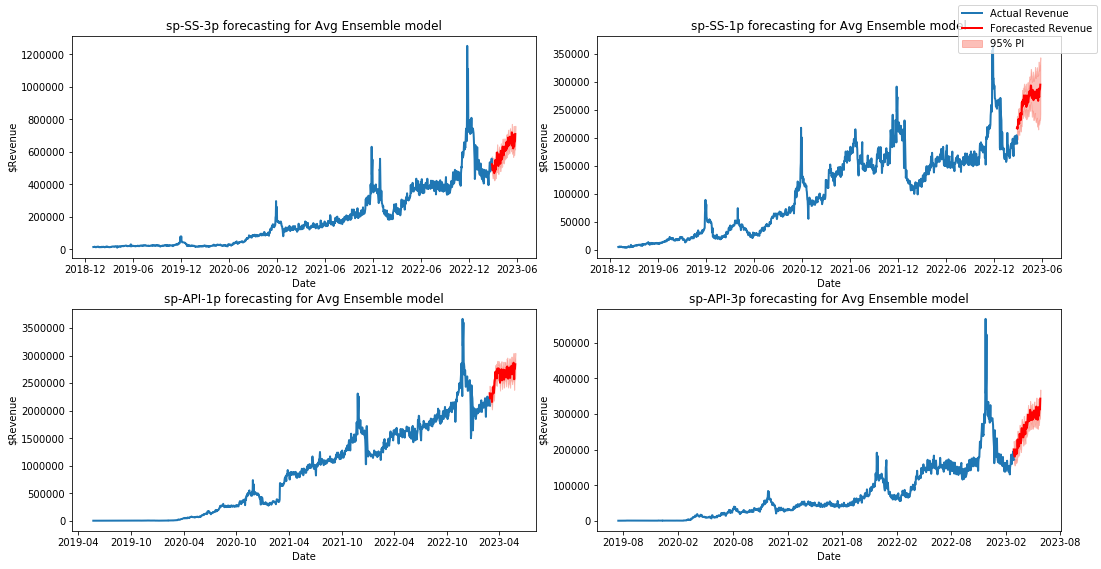

In [179]:
plot_forecast(df,forecast_avg_E_df,forecast_prophet_interval_width,model='Avg Ensemble')

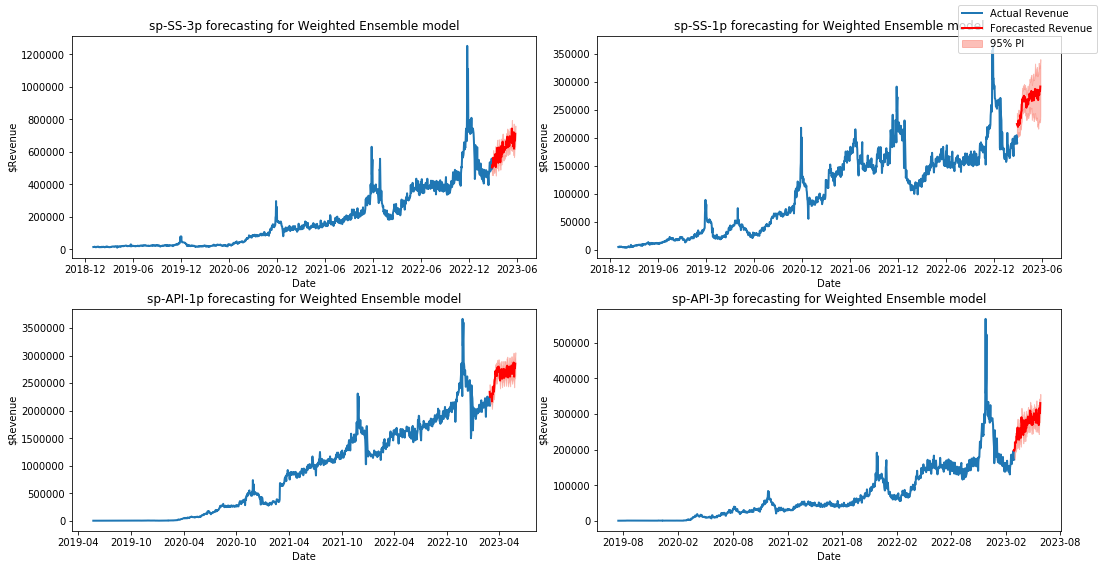

In [180]:
plot_forecast(df,forecast_weightedE_df,forecast_prophet_interval_width,model='Weighted Ensemble')

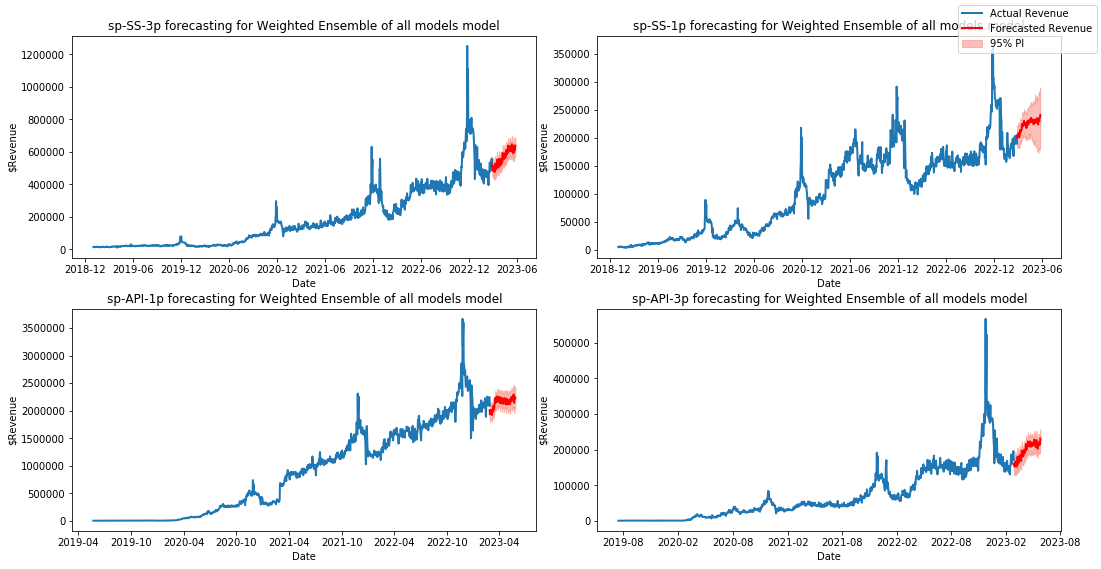

In [246]:

plot_forecast(df,forecast_avg_E_df_all,forecast_prophet_interval_width,model='Weighted Ensemble of all models')

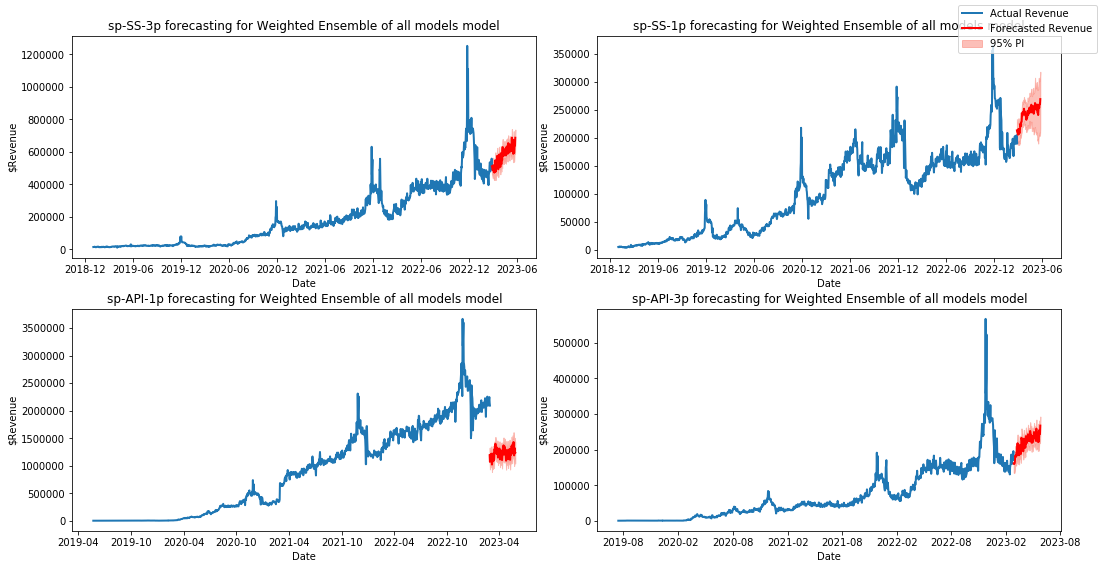

In [247]:
plot_forecast(df,forecast_weightedE_df_all,forecast_prophet_interval_width,model='Weighted Ensemble of all models')

In [4]:
def plot_forecast_yearly(df,df_x,df_fill, model='_prophet',forecast_days=90):
    products=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p', 'sp-API-3p']
    
    f, a = plt.subplots(nrows=2, ncols=2, sharex=False,figsize=(15, 8))
    f.tight_layout(pad=3)
    ax = a
    i,j=0,0
    counter=0
    df_ts_future = pd.DataFrame(pd.date_range(start='2023-02-27', periods=365), columns=['dt'])
    
    df_x['ds']=df_ts_future['dt']
    for ix,product in enumerate(products):
        i,j=divmod(counter,2)
        
        df_z=df[df['Product']==product]
        ax[i,j].plot(df_z['dt'],df_z['Revenue'], '-',lw=2)
        
        col=product+model
        
        col_lower=product+'_lower_interval_width'
        col_upper=product+'_upper_interval_width'
        
        df_u=df_x[[col,'ds']]
        df_w=df_fill[[col_lower,col_upper]]
        
        ax[i,j].plot(df_u['ds'],df_u[col], color='r',lw=2 )#label = metrice
        ax[i,j].fill_between(x=df_u['ds'], y1=-df_w[col_lower]+df_u[col], y2 = df_w[col_upper]+df_u[col], alpha=0.5, color='salmon')

        counter+=1
        
        ax[i,j].set_ylabel("$Revenue")
        ax[i,j].set_xlabel("Date")
        ax[i,j].set_title(str(product)+' forecasting for '+str(model)+' model')
        
    f.legend(['Actual Revenue','Forecasted Revenue','95% PI'])
    return

In [6]:
cloud_dir = "ds/forecast/demand_forecast/"
forecast_result_filename='one_year/prediction/'
evaluation_results_filename = 'one_year/internal_evaluation/'

filename='forecasting_Prophet.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_prophet_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_prophet_df['_c0']
del forecast_prophet_df['ds']
for col in forecast_prophet_df:
    forecast_prophet_df[col]=forecast_prophet_df[col].values.astype(float)

filename='forecasting_Prophet_Interval_Width.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_prophet_interval_width = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_prophet_interval_width['_c0']
for col in forecast_prophet_interval_width:
    forecast_prophet_interval_width[col]=forecast_prophet_interval_width[col].values.astype(float)
forecast_prophet_df.columns=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p','sp-API-3p']

In [14]:
filename='forecasting_NeuralProphet.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_neuralprophet_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_neuralprophet_df['_c0']
del forecast_neuralprophet_df['ds']
for col in forecast_neuralprophet_df:
    forecast_neuralprophet_df[col]=forecast_neuralprophet_df[col].values.astype(float)
    
filename='forecasting_Ml.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_ml_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_ml_df['_c0']
# del forecast_ml_df['ds']
for col in forecast_ml_df:
    forecast_ml_df[col]=forecast_ml_df[col].values.astype(float)

In [15]:
filename='forecasting_Ml_untuned.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_ml_untuned_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_ml_untuned_df['_c0']
# del forecast_ml_df['ds']
for col in forecast_ml_untuned_df:
    forecast_ml_untuned_df[col]=forecast_ml_untuned_df[col].values.astype(float)

In [18]:
forecast_neuralprophet_df.columns=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p',
       'sp-API-3p']
# forecast_ml_df.columns=['sp-SS-3p', 'sp-SS-1p', 'sp-API-1p',
#        'sp-API-3p']



In [19]:
filename='one_year_forecasting_MSTL.csv'
path= 'gs://adtech-artifacts/'+cloud_dir+forecast_result_filename+filename
forecast_mstl_df = spark.read.format("bigquery").option("header", True).option('sep', '\t').csv(path).toPandas()
del forecast_mstl_df['_c0']
for col in forecast_mstl_df:
    forecast_mstl_df[col]=forecast_mstl_df[col].values.astype(float)

In [20]:
 'gs://adtech-artifacts/'+cloud_dir+'one_year/'+evaluation_results_filename

'gs://adtech-artifacts/ds/forecast/demand_forecast/one_year/one_year/internal_evaluation/'

In [36]:
dfs_all=[forecast_prophet_df,forecast_mstl_df,forecast_ml_df]
eval_mets=[eval_prophet_df,eval_mstl_df,eval_ml_df]


In [22]:
dfs=[forecast_prophet_df,forecast_mstl_df]

In [37]:
forecast_avg_E_df,forecast_weightedE_df=create_ensemble_fit(dfs,eval_mets)


In [38]:
forecast_weightedE_df

,sp-SS-3p,sp-SS-1p,sp-API-1p,sp-API-3p
0,503346.494772,224743.729575,2.341377e+06,197894.022643
1,517736.502590,223075.764708,2.246292e+06,199048.287628
2,506316.968793,222224.394542,2.269958e+06,196801.039507
3,503494.396889,221395.935950,2.259336e+06,198434.773439
4,530753.285558,219521.539904,2.256645e+06,203489.927700
...,...,...,...,...
360,701014.551309,305992.165196,3.357887e+06,362940.176560
361,707521.117168,306401.117382,3.240734e+06,354336.951009
362,714470.507501,313315.018638,3.215795e+06,360656.427012
363,738104.739731,326706.925300,3.313659e+06,376174.255434


In [39]:
forecast_neuralprophet_df

,sp-SS-3p,sp-SS-1p,sp-API-1p,sp-API-3p
0,530825.93750,40325.179688,2303341.00,190054.250000
1,485185.75000,39633.960938,2208858.75,168678.734375
2,478013.56250,40801.046875,2217194.75,165261.718750
3,459871.84375,40996.597656,2219654.75,159587.609375
4,434765.68750,41049.839844,2178257.25,150128.078125
...,...,...,...,...
360,710026.93750,56407.246094,3704352.25,243597.515625
361,710306.56250,56659.542969,3677315.75,245947.562500
362,784154.62500,55590.996094,3820493.50,277133.312500
363,852157.06250,55109.886719,3995647.25,306320.031250


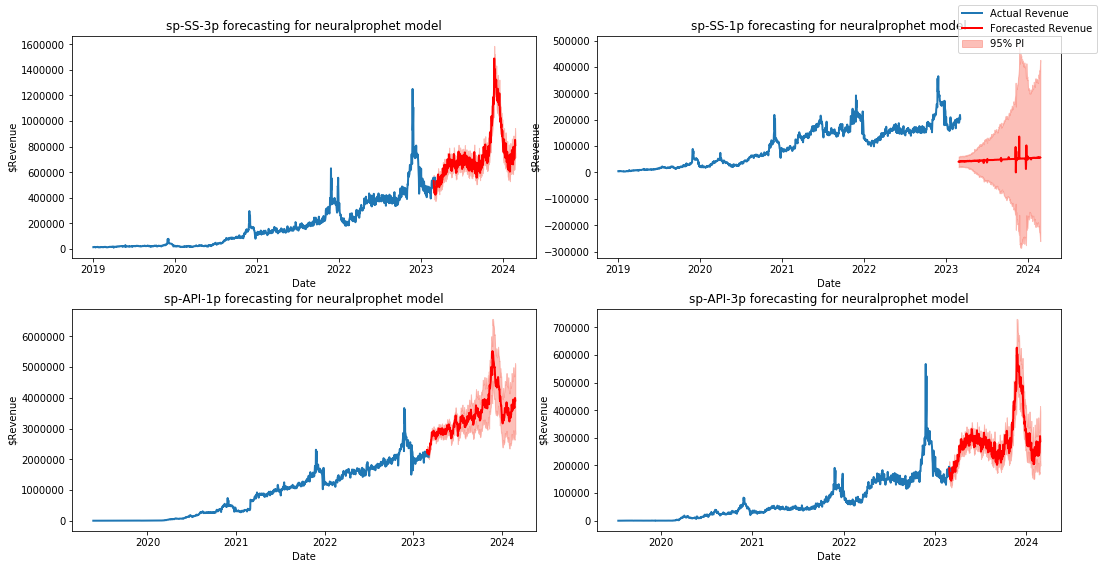

In [42]:
plot_forecast(df,forecast_neuralprophet_df,forecast_prophet_interval_width, model='neuralprophet',forecast_days=365)

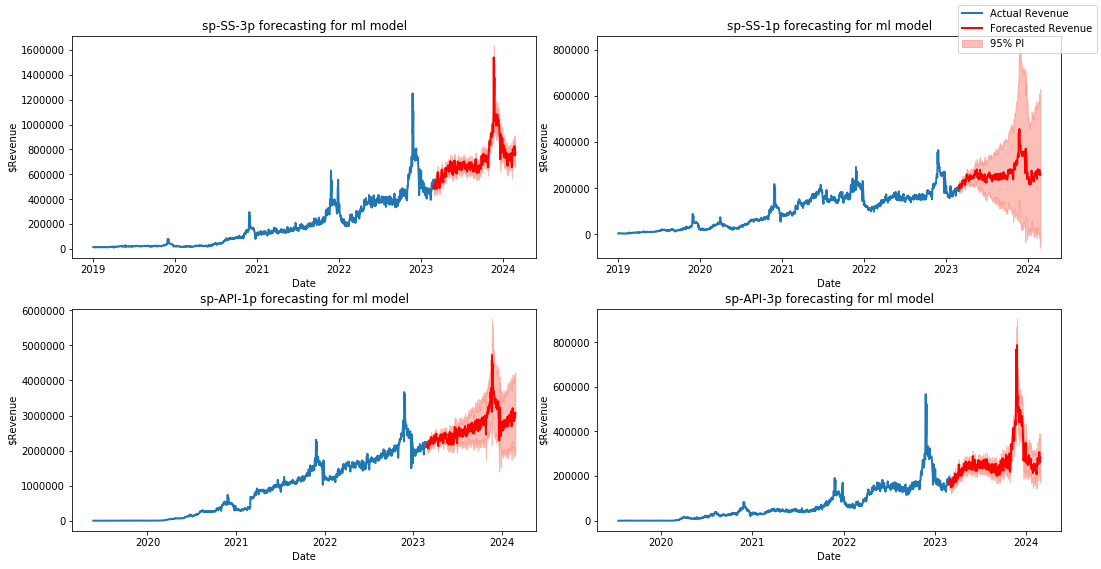

In [43]:
plot_forecast(df,forecast_ml_df,forecast_prophet_interval_width, model='ml',forecast_days=365)

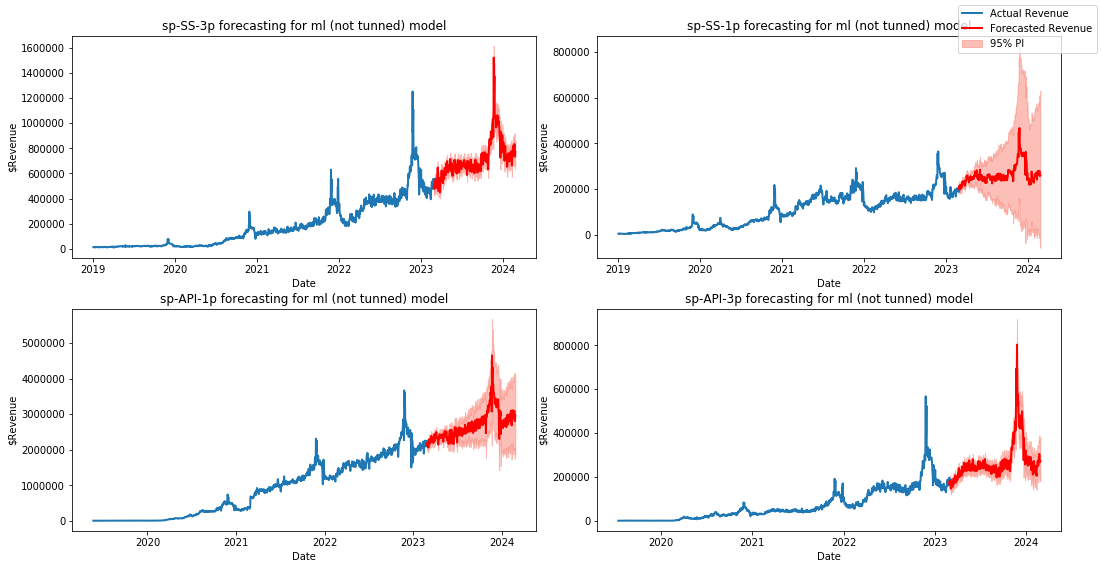

In [46]:
plot_forecast(df,forecast_ml_untuned_df,forecast_prophet_interval_width, model='ml (not tunned)',forecast_days=365)

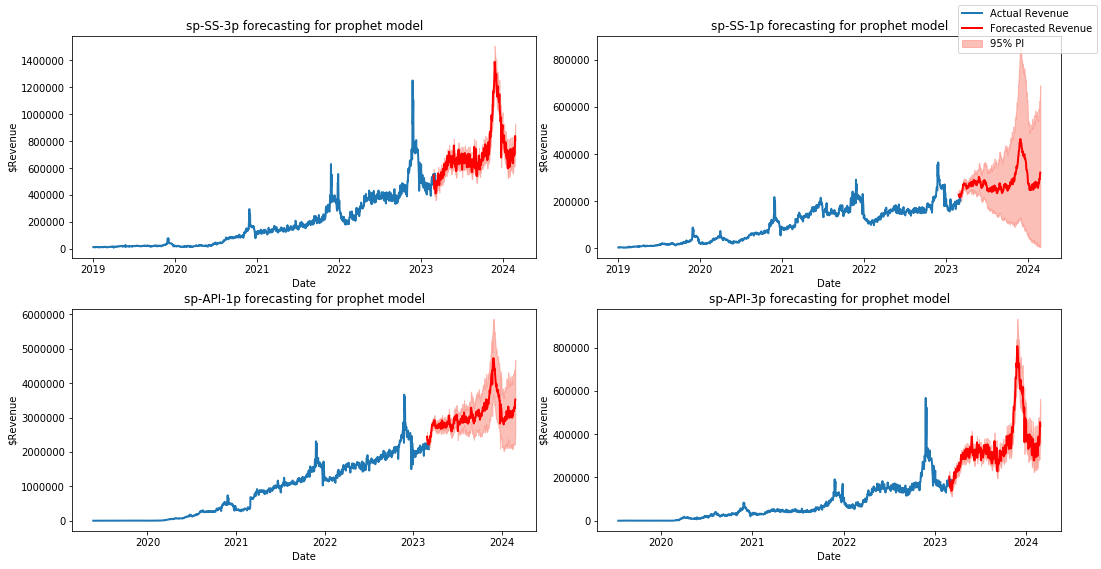

In [47]:
plot_forecast(df,forecast_prophet_df,forecast_prophet_interval_width, model='prophet',forecast_days=365)

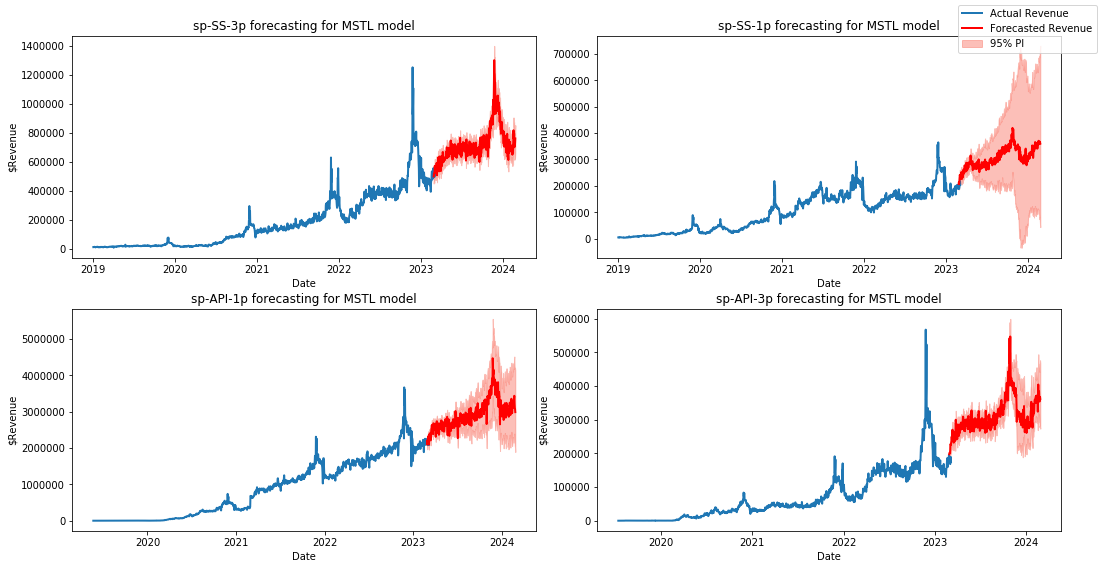

In [48]:
plot_forecast(df,forecast_mstl_df,forecast_prophet_interval_width, model='MSTL',forecast_days=365)

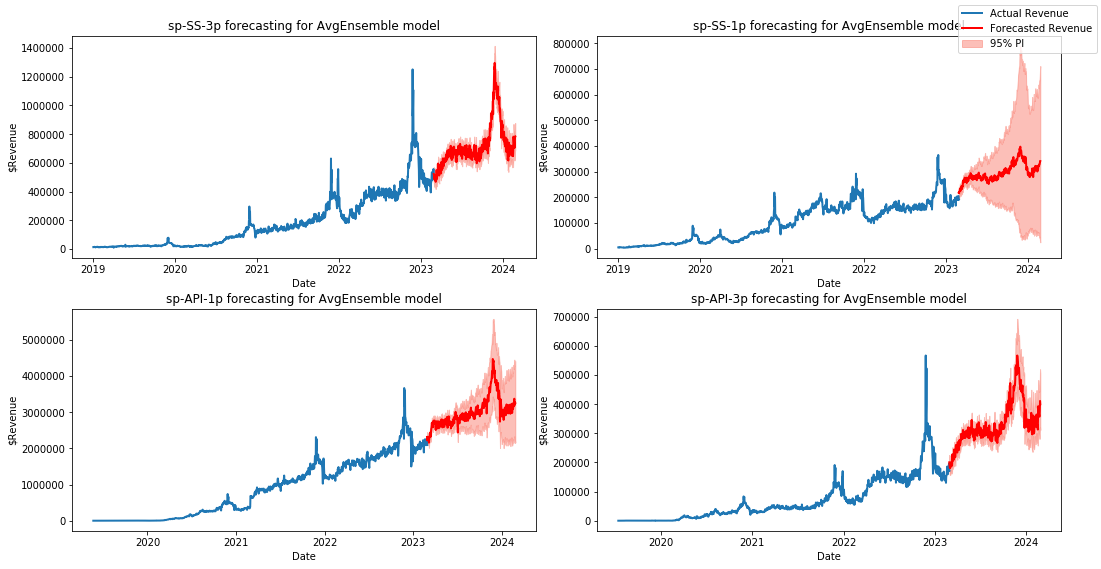

In [30]:
plot_forecast(df,forecast_avg_E_df,forecast_prophet_interval_width, model='AvgEnsemble',forecast_days=365)

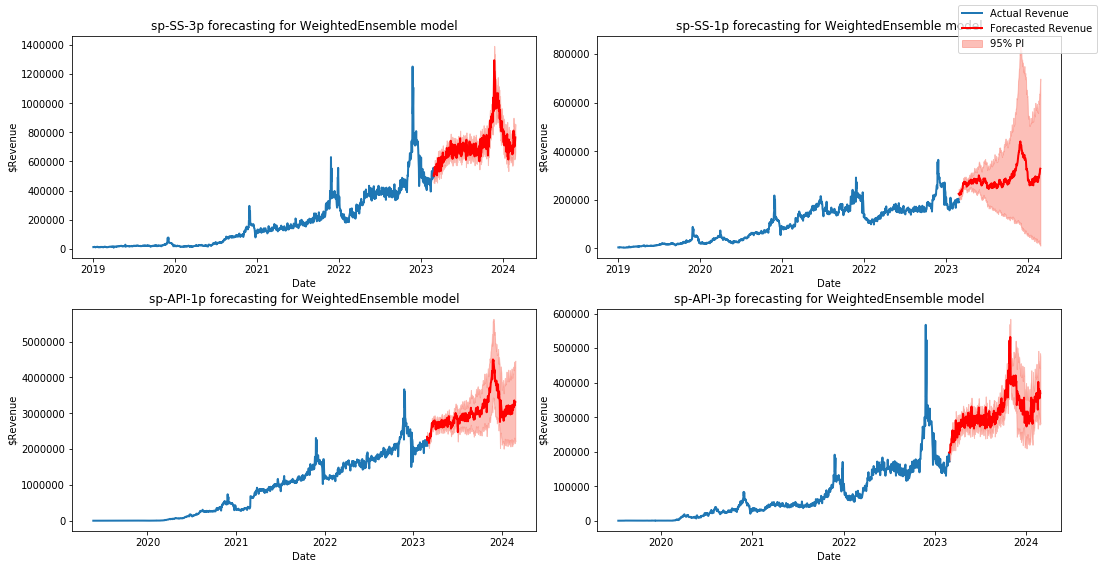

In [31]:
plot_forecast(df,forecast_weightedE_df,forecast_prophet_interval_width, model='WeightedEnsemble',forecast_days=365)
